# Introduction to Python&Scikit 



Agenda:
* Loading datasets
* Splitting dataset
* Preprocessing
    * Encoding variables into 
    * Intro to Estimators interface
    * Feature scalling
* Support Vector Machines (SVMs)
    * Intro & Application to SVMs
    * Plotting
* Model Evaluation
    * Evaluation metrics
    * Naive evaluation
    * K-fold evaluation with hyperparameter grid search


A few words before starting:
* I am not an expert in the topic (disclaimer).
* Thanks to Dimis for advices during the preparation.
* Feel free to interact and share your opinion. 
* If get stucked somewhere, ask! If I cannot help, just listen and I will help you after the class.

Author: Adam Zika, JADS

Date: 17/3/2017



In [2]:
%%html
<!-- aligning all picture to the left -->
<style>
 .rendered_html img {margin: 0px;}
</style>

# Data loading
* Scikit provides several "traditional" datasets such as iris, digits, and boston. There is a dataset for each type of a machine learning problem.
* Data can be loaded manually.

In [3]:
# loading data using scikit learn
from sklearn.datasets import load_iris
data = load_iris()
print(data.keys())

dict_keys(['data', 'DESCR', 'feature_names', 'target', 'target_names'])


In [4]:
# Manual data loading
import pandas as pd
df = pd.read_csv('iris.data', names = ['sep_len', 'sep_width', 'pet_len','pet_wid', 'y']) #Source: https://archive.ics.uci.edu/ml/datasets/Iris
df = df[['sep_len', 'sep_width',  'y']] # get 2-dimensional data. It is simplification to be able to plot the data
df #raw data

,sep_len,sep_width,y
0,5.1,3.5,Iris-setosa
1,4.9,3.0,Iris-setosa
2,4.7,3.2,Iris-setosa
3,4.6,3.1,Iris-setosa
4,5.0,3.6,Iris-setosa
5,5.4,3.9,Iris-setosa
6,4.6,3.4,Iris-setosa
7,5.0,3.4,Iris-setosa
8,4.4,2.9,Iris-setosa
9,4.9,3.1,Iris-setosa


# Preprocessing
* Code all data into floats.
* Scale features.

## Encoding variables into floats
Explanatory variables are already numbers. We need to convert only classes.

In [5]:
#Coding class into a number, 
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
y = le.fit_transform(df['y']) 
X = df.drop('y', axis=1) #axis = 0 for rows, axis = 1 for columns
print(list(df['y']))
print()
print(y)

['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor', 'I

<span style="font-size:140%">**Estimators**</span> [Source](http://scikit-learn.org/stable/tutorial/statistical_inference/settings.html)
* An estimator is any object that learns from data. 
* E.g. classification, regression or clustering algorithms or transformers that extracts/filters useful features from raw data.
* Why introducing? They have a unified interface.

All estimator objects have a *fit* method that takes a dataset (usually a 2-d array) and learns from it (i.e., set model's parameters):
<pre> estimator.fit(data) </pre>

**Further methods differ per estimator type**
* supervised (classification, regression) - *fit(), predict(), fit_predict()*
* unsupervised 
    * matrix factorization problems (PCA) - *fit(), transform(), fit_transform()*
    * clustering - *fit(), predict()*, sometimes also *transform()*
    * ...

In general, all transformers (i.e., estimators that transform data - e.g LabelEncoder()) have *fit()*, *transform()*, and *fit_transform()* methods. 

**Estimators parameters**
<pre>
estimator = Estimator(param1=1, param2=2)
estimator.param1
</pre>

**Estimated parameters**
<pre>
estimator.estimated-param_
</pre>

**Let's look at**
<pre>y = le.fit_transform(df['y'])</pre>


In [6]:
#what estimator.fit does?
le_tmp = preprocessing.LabelEncoder()
le_tmp.fit(df['y']) # fitting model = setting parameters of the model
# 'Iris-setosa' = 0
# 'Iris-versicolor' = 1
# ...


LabelEncoder()

In [7]:
le_tmp.classes_

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [9]:
le_tmp.transform(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor'])

array([0, 0, 0, 1, 1], dtype=int64)

In [10]:
# Fitting and transforming together
le_tmp = preprocessing.LabelEncoder()
le_tmp.fit_transform(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor'])

array([0, 0, 0, 1], dtype=int64)

## Feature scalling ([source](http://sebastianraschka.com/Articles/2014_about_feature_scaling.html))

= data normalization. 

There are different ways how to scale features. Here, we do a standard scalar normalization - features will be rescaled such that μ=0 and σ=1 according to:  

<img src="imgs/scalling.png" />


**Why to normalize?**
* Variables have the same units.
* Requirement (assumption) for many models (e.g., Nearest Neighbour, SVM, and PCA).
* The only family of algorithms of being scale-invariant are tree-based methods (e.g., Decision Trees). 

**Why NOT normalize?**
* Difficult to intepret the values. Think how would you intepret if someone tells you that his or her age is -0.53?!

** Always the data normalize (unless you have a good reason why not to)! **



In [11]:
people = pd.DataFrame(data = [['john', 31000, 25], ['mark',30000, 65], ['adam',35000, 25]], columns=['name','income', 'age'])
print(people) 

   name  income  age
0  john   31000   25
1  mark   30000   65
2  adam   35000   25


** Who of these guys are the most alike each other? **

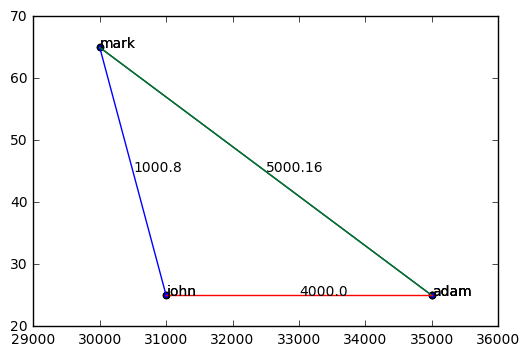

In [12]:
# The effect of scaling on Eucliadian distance (that is used e.g. by Nearest Neighbour).
import math
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

def compute_distance(obj1, obj2): 
    '''Computes euclidian distance of two vectors.'''
    
    sum = 0
    for i in range(len(obj1)):
        sum+= (obj1[i] - obj2[i])**2
    return math.sqrt(sum)

def plot_people(people, init_call):
    '''Plots 3 people into a vector space and shows Euclidian distance between them.'''
    
    dist_not_norm = compute_distance(people.loc[0,['income', 'age']], people.loc[1,['income', 'age']])
    plt.scatter(people['income'], people['age'])
    plt.plot(people['income'], people['age'])
  
    for index, person in people.iterrows():
        plt.text(person['income'], person['age'], person['name'])
    plt.text(np.mean(people[:2]['income']), np.mean(people[:2]['age']), round(dist_not_norm,2) )
    
    if init_call:
        people_1_2 = people.iloc[[1]].append(people.iloc[[2]], ignore_index = True) #people.iloc[ Array ] returns DataFrame, people.iloc[ INT ] return Series.
        plot_people(people_1_2, init_call = False)          
        people_0_2 = people.iloc[[0]].append(people.iloc[[2]], ignore_index = True)
        plot_people(people_0_2, init_call = False)  
        plt.show()

plot_people(people, init_call=True)

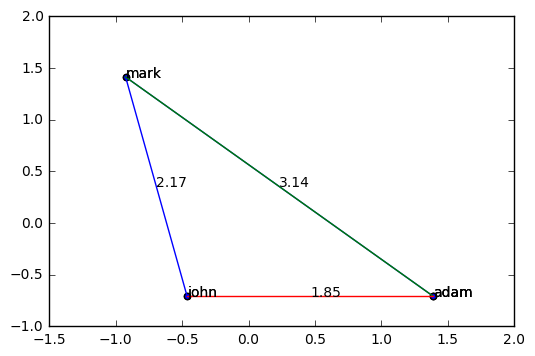

In [13]:
# Using scaled features.
people_norm = people.copy()
people_norm[['income', 'age']] = preprocessing.scale(people_norm[['income', 'age']])
plot_people(people_norm,  init_call=True) # Distances changes after the feature scalling such that relatively distances between people are different.

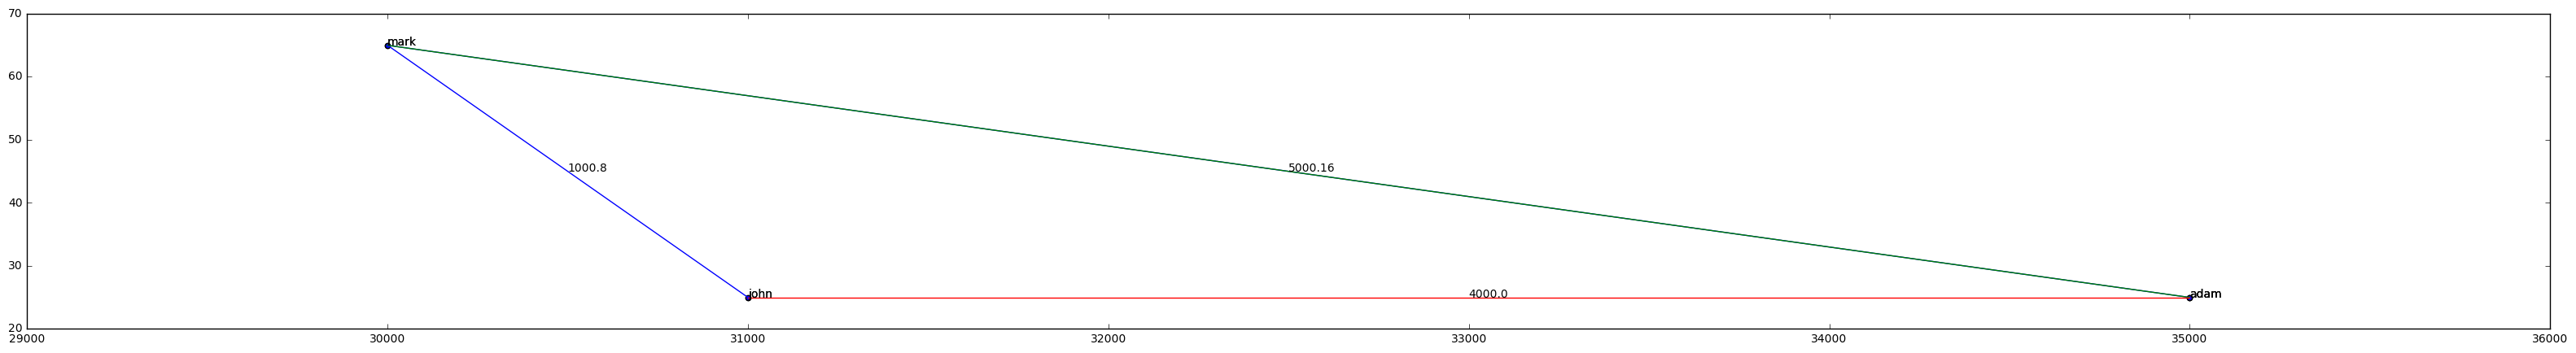

In [14]:
# How the orignal figures rather looks like."
plt.figure(figsize = (40,5))
plot_people(people, init_call = True) 

** Think how would SVM separate that classes in following example? **
<img src="imgs/svm-feature-scalling.png">

** Regardless the age, anyone with income higher than 31,000 would be classified as a circle. **
<img src="imgs/svm-feature-scalling-solution.png">

** Effect of feature scaling PCA.** [Source](http://scikit-learn.org/dev/auto_examples/preprocessing/plot_scaling_importance.html)

<p>PCA might determine that the direction of maximal variance more closely corresponds with the features with higher variance.</p>
<img src="imgs/pca-feature-scalling.png" width="600">


** Effect of feature scalling on gradient descent.** [Source](http://m.blog.csdn.net/article/details?id=50670674)

<p>Gradient descent with non-scalled features can go zig-zap and is much slowier.</p>
<img src="imgs/featurescaliing-gradient2.png">

In [16]:
# data normalization
from sklearn import preprocessing
X[['sep_len','sep_width']] = preprocessing.scale(X) #.scale() returns numpy.ndarray and normally we would keep it like this. 
													#But now when we learn, it is more clear to refer to the dimensions by names.
print(X.mean(axis=0)) #almost zero
print(X.std(axis=0))

sep_len      1.049161e-16
sep_width   -9.150088e-17
dtype: float64
sep_len      1.00335
sep_width    1.00335
dtype: float64


# Splitting the data
A dataset should be split to the following sets:
* training: for training purposes
* validation: for evaluation of a trained model (hyperparemeters can be influenced by knowing the validation set)
* test set: final evaluation, completely hidden set, used just once
<img src="imgs/eval-validation.gif" />

In [20]:
# Split a dataset into testing and training
from sklearn.model_selection import train_test_split
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.3, random_state=42) # random_set data set is explained further cells.
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.3, random_state=42) 
print ("Training set: %d flowers\nValidation set: %d flowers\nTesting set: %d flowers" % (len(X_train), len(X_val), len(X_test)))


Training set: 73 flowers
Validation set: 32 flowers
Testing set: 45 flowers


In [29]:
# Splitting data when param random_state is not defined. Souce: http://stackoverflow.com/questions/28064634/random-state-pseudo-random-numberin-scikit-learn
X_tmp, y_tmp = np.arange(10).reshape((5, 2)), range(5) 

split_1 = train_test_split(X_tmp, y_tmp, test_size=0.3)
split_2 = train_test_split(X_tmp, y_tmp, test_size=0.3)
#The sets are different.
print(split_1)
print(split_2)

[array([[8, 9],
       [0, 1],
       [4, 5]]), array([[6, 7],
       [2, 3]]), [4, 0, 2], [3, 1]]
[array([[6, 7],
       [8, 9],
       [4, 5]]), array([[2, 3],
       [0, 1]]), [3, 4, 2], [1, 0]]


In [31]:
# Splitting data when param random_state is defined
split_1 = train_test_split(X_tmp, y_tmp, train_size=0.7, random_state = 11)
split_2 = train_test_split(X_tmp, y_tmp, test_size=0.3, random_state = 11)
#The sets are the same.
print(split_1)
print(split_2)

[array([[0, 1],
       [6, 7],
       [2, 3]]), array([[4, 5],
       [8, 9]]), [0, 3, 1], [2, 4]]
[array([[0, 1],
       [6, 7],
       [2, 3]]), array([[4, 5],
       [8, 9]]), [0, 3, 1], [2, 4]]


# Support Vector Machine (SVM)
See intro-svm.pptx.

In [32]:
#traing a model
from sklearn import svm
svc = svm.SVC(kernel='linear', C=1) 
#trying C in range of 10^-3 and 10^3 is usually sufficient (http://scikit-learn.org/stable/auto_examples/svm/plot_rbf_parameters.html)
#also has random_state parameter
svc.fit(X_train, y_train)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

## Visualization of the SVC model
How to get this?
<img src="imgs/svc-vis.png">

**Steps:**

**1)** Create meshgrid = matrix that holds in each cell the x and y coordinates for each point in a space ([source](http://stackoverflow.com/questions/39662699/numpy-meshgrid-explanation)).

Example of a meshgrid in a space <-3,3>, which is approximately the range of the sepal lenght and width:
<img src="imgs/svc-vis-mesh-sparse.png" />
**2)** Classify each point of the meshgrid by SVC.
<img src="imgs/svc-vis-mesh-sparse-classify.png" />
**3)** Apply conturf:
<img src="imgs/svc-vis-mesh-sparse-conturf.png" />

**4)** Plot the flowers into the vector space. 
<img src="imgs/svc-vis.png">



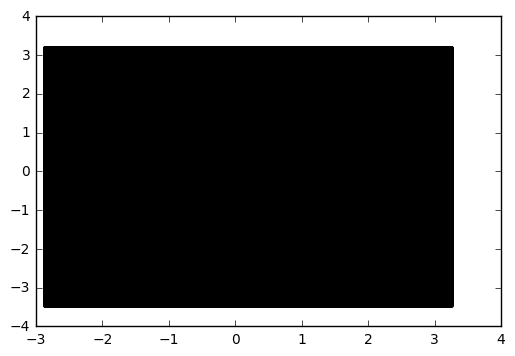

In [40]:
# Step 1) Creating a meshgird
import numpy as np
#we will work only with 2-dimensions
len_min, len_max = X_train['sep_len'].min() - 1, X_train['sep_len'].max() + 1 #+-1 is there to don't have min, max points at the boundaries of the plot
width_min, width_max = X_train['sep_width'].min() - 1, X_train['sep_width'].max() + 1
h = np.abs(len_max / len_min) / 100 # we want to have 100 steps. We will also use it for width since the data are normalized.

xx, yy = np.meshgrid(np.arange(len_min, len_max, h), np.arange(width_min, width_max, h)) 
plt.plot(xx, yy, marker='.', color='k', linestyle='none') #plotting the meshgrid for sepal lenght and width
plt.show() #there are too many steps to see the individual points

In [43]:
# Step 2) classifying each point of the meshgrid
Z = svc.predict(np.c_[xx.ravel(), yy.ravel()]) #show in console what this does
Z

array([1, 1, 1, ..., 2, 2, 2], dtype=int64)

In [44]:
# Step 3) applying conturf function 
import matplotlib.pyplot as plt
Z = Z.reshape(xx.shape) #reshape Z into the original size of the meshgrid
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8) # xx = x coords, yy = y coords, Z = value, cmap = colormap

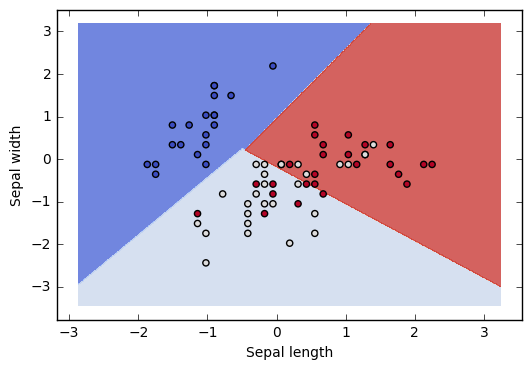

In [45]:
# Step 4) plotting the flowers into the vector space
plt.scatter(X_train['sep_len'], X_train['sep_width'], c=y_train, cmap=plt.cm.coolwarm) # c = colors (float or RBG), cmap = colormap (when c are floats) 
plt.xlabel('Sepal length')
plt.ylabel('Sepal width') 
plt.show() 

*Example of a conturf which you might be familiar with*
<img src="imgs/conturf.png" width="400">

# Model evaluation

## Evaluation metrics
We are done (for a moment) with training a model, let's evaluate it. 

There are a number of evaluation metrics. The basic ones are precision, recall, and accuracy. We will look into them for single and multi-class cases.

### Single class case

Let's think about precision, recall, and accuracy in the context of:
* Identification of terrorists.
* Identification of innovative users.

<img src="imgs/Precisionrecall.jpg" width="700"/>

Recall is often difficult to be computed, because the total number of positive instances needs to be known.

** Questions ** 
* In which case is recall and in which case is precision more important (think for both cases)? 
* Is accuracy of 90% when identifying terrorist good? <!-- 100 people consists of 10 terrorists and 90 regular citizens. 90% accuracy can be achieved by classifying all people as citizens.-->


** F1 metric **

It is a combination of precisiond and recall; it is their weighted average.
<img src="imgs/f1.jpg" width="200"/>

Properties:
* weight is 1-1, but can be adjusted.
* ranges from 0-1


### Multi-class case
* The evaluation metrics apart from accuracy are computed per class (one-vs-rest) or can be avaraged. Accuracy by definition fits the multi-class case. 
* It is useful to use confusion matrix (see below) to evaluate an estimator's performance (especially when more classes are present). 


Adapted from [Wiki](https://en.wikipedia.org/wiki/Precision_and_recall).


## Simple evaluation
Here, we will only use accuracy as the evaluation metric (NEVER DO THAT). In the next section, we will use more metrics.

### Evaluation of validation set

In [46]:
accuracy = svc.score(X_val, y_val)  #svc.score return mean accuracy
print("Accuracy is ", accuracy) #Accuracy can be very misleading measure. Results needs to be always further inspected and/or evaluated on more metrics.
y_pred = svc.predict(X_val) 
y_pred

Accuracy is  0.75


array([1, 2, 2, 1, 1, 2, 2, 1, 1, 1, 0, 2, 0, 2, 2, 2, 1, 0, 0, 0, 0, 0, 2,
       1, 2, 2, 1, 0, 0, 2, 2, 0], dtype=int64)

In [47]:
#predicted data in the original space
le.inverse_transform(y_pred)

array(['Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-virginica', 'Iris-versicolor',
       'Iris-setosa', 'Iris-setosa', 'Iris-virginica', 'Iris-virginica',
       'Iris-setosa'], dtype=object)

In [48]:
#computing confusion matrix
from sklearn.metrics import confusion_matrix
import itertools

cnf_matrix = confusion_matrix(y_val, y_pred)  #computes confusion matrix
print(cnf_matrix)

[[10  1  0]
 [ 0  6  5]
 [ 0  2  8]]


Confusion matrix, without normalization


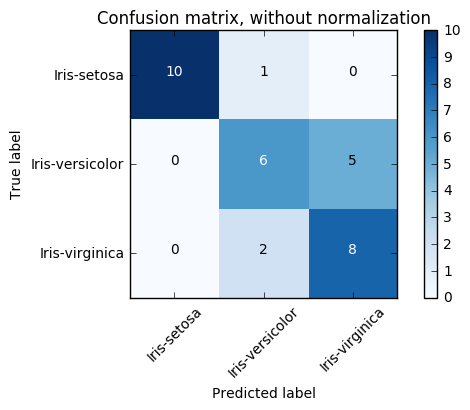

In [49]:
#plotting the confusion matrix nicely
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    # Source: http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    cm = np.around(cm, decimals=2) # ADDED by Adam
    #print(cm)
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes= le.classes_, title='Confusion matrix, without normalization')
plt.show()

Normalized confusion matrix


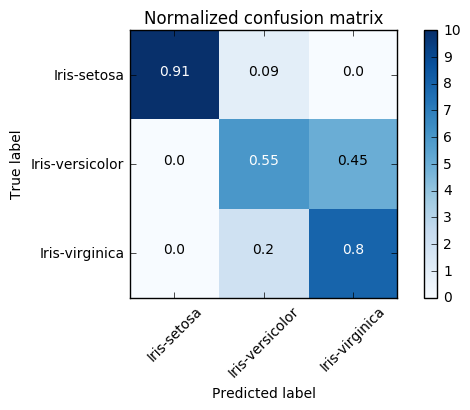

In [50]:
# plotting normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=le.classes_, normalize=True, title='Normalized confusion matrix')
plt.show() 

** The flowers **

You can see in the confusion matrix that the iris-versicolor and iris-virginica are seen by classifier similar (using only sepal length and width). If you look at the picture, sepal (i.e., the endings) length and width of versicolor and virginia are indeed similar.

<img src="imgs/iris_types.jpg" width="800">


### (Naive) tuning of hyperparameters
Initially, we set C=1, but was that right choice? Let's find out.

In [51]:
svc001 = svm.SVC(kernel='linear', C=0.01) 
svc001.fit(X_train, y_train)
print("Accuracy is (C=0.01) ", svc001.score(X_val, y_val))

svc01 = svm.SVC(kernel='linear', C=0.1) 
svc01.fit(X_train, y_train)
print("Accuracy is (C=0.1) ", svc01.score(X_val, y_val))

print("Accuracy is (C=1) ", svc.score(X_val, y_val))

svc10 = svm.SVC(kernel='linear', C=10) 
svc10.fit(X_train, y_train)
print("Accuracy is (C=10) ", svc10.score(X_val, y_val))


Accuracy is (C=0.01)  0.34375
Accuracy is (C=0.1)  0.75
Accuracy is (C=1)  0.75
Accuracy is (C=10)  0.75


### Evaluation of test set

In [52]:
#The best model is with e.g. C=1. We claim in this perform, linear SVC performs the best. Is that true? Let's verify on the unseen data set. You ALWAYS perform this step only once!
print("The accuracy to be reported is %.2f" % svc.score(X_test, y_test)) #This is what is going to be the result of the SVC.

The accuracy to be reported is 0.80


## Evaluation using k-fold cross-validation

Data should be split into training, validation, and testing. This reduces data with which a model can be trained quite a lot. Solution? Cross-validation. 

Test set is still and ALWAYS needed, however, training and validation sets can combined.

**How it works?**

<img src="imgs/cross-validation.jpg" align="left">

In [55]:
#aplication of cross-validation.
from sklearn.model_selection import cross_val_score #cross_val_score = KFold without shuffeling. The results are deterministic.
from sklearn import metrics

precisions = cross_val_score(svm.SVC(C=1), X_train_val, y_train_val, cv=4, scoring="precision_weighted") 
recalls = cross_val_score(svm.SVC(C=1), X_train_val, y_train_val, cv=4, scoring="recall_weighted") 
accuracies = cross_val_score(svm.SVC(C=1), X_train_val, y_train_val, cv=4, scoring="accuracy") 
#cv = 4: 4-fold cross-validation. 
#Reminder: some of the other cross validation mechanisms also contains random_state. 
#scoring: _weighted is a suffix defining how to avarage the scores needs. More in at http://scikit-learn.org/stable/modules/model_evaluation.html#multiclass-and-multilabel-classification and  http://rushdishams.blogspot.nl/2011/08/micro-and-macro-average-of-precision.html

print("Precision: %0.2f (+/- %0.2f)" % (precisions.mean(), precisions.std() * 2)) 
print(precisions)


print("Recall: %0.2f (+/- %0.2f)" % (recalls.mean(), recalls.std() * 2)) 
print(recalls)


print("Accuracy: %0.2f (+/- %0.2f)" % (accuracies.mean(), accuracies.std() * 2)) 
print(accuracies)

Precision: 0.82 (+/- 0.10)
[ 0.81292517  0.82692308  0.89349112  0.74714286]
Recall: 0.79 (+/- 0.09)
[ 0.78571429  0.80769231  0.84615385  0.72      ]
Accuracy: 0.79 (+/- 0.09)
[ 0.78571429  0.80769231  0.84615385  0.72      ]


### Tuning hyper-parameters using Grid Search

In [62]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report


# Set the parameters by cross-validation
tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4], 'C': [1, 10, 100, 1000]}, #rbf -> Radius based Kernel. One of the kernel's used to separate non-linear patterns
                    {'kernel': ['linear'], 'C': [0.1, 00.1, 1, 10, 100, 1000,10000]}] 

scores = ['precision_weighted', 'recall_weighted', 'accuracy']
score = scores[0] #change this manually (having this in for loop would be better. we keep it like this for learning purposes.)
print("# Tuning hyper-parameters for %s \n" % score)

clf = GridSearchCV(estimator = svm.SVC(), param_grid = tuned_parameters, cv = 4, scoring = score) 
clf.fit(X_train, y_train)

means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']

print("Grid scores on development set (with 4-fold cross-validation):")

# what does zip do?
list(zip([0,1], ['zero','one']))
#>> [(0, 'zero'), (1, 'one')]

for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))
    
print("\nBest parameters set found on development set: %s" % clf.best_params_)
print("----------------------------------------------------\n")

print("Evaluating the test set given the best parameters:\n")
y_true, y_pred = y_test, clf.predict(X_test)
print(classification_report(y_true, y_pred, target_names=le.classes_), "\n") 
# NOTE: The support is the number of occurrences of each class in y_true.

# Note the problem is too easy: the hyperparameter plateau is too flat and the
# output model is the same for precision and recall with ties in quality.

# Tuning hyper-parameters for precision_weighted 



C:\Users\azika\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\azika\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\azika\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\azika\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  '

Grid scores on development set (with 4-fold cross-validation):
0.168 (+/-0.126) for {'gamma': 0.001, 'kernel': 'rbf', 'C': 1}
0.168 (+/-0.126) for {'gamma': 0.0001, 'kernel': 'rbf', 'C': 1}
0.635 (+/-0.300) for {'gamma': 0.001, 'kernel': 'rbf', 'C': 10}
0.168 (+/-0.126) for {'gamma': 0.0001, 'kernel': 'rbf', 'C': 10}
0.815 (+/-0.173) for {'gamma': 0.001, 'kernel': 'rbf', 'C': 100}
0.635 (+/-0.300) for {'gamma': 0.0001, 'kernel': 'rbf', 'C': 100}
0.824 (+/-0.194) for {'gamma': 0.001, 'kernel': 'rbf', 'C': 1000}
0.815 (+/-0.173) for {'gamma': 0.0001, 'kernel': 'rbf', 'C': 1000}
0.817 (+/-0.230) for {'kernel': 'linear', 'C': 0.1}
0.817 (+/-0.230) for {'kernel': 'linear', 'C': 0.1}
0.824 (+/-0.194) for {'kernel': 'linear', 'C': 1}
0.790 (+/-0.263) for {'kernel': 'linear', 'C': 10}
0.804 (+/-0.250) for {'kernel': 'linear', 'C': 100}
0.804 (+/-0.250) for {'kernel': 'linear', 'C': 1000}
0.804 (+/-0.250) for {'kernel': 'linear', 'C': 10000}

Best parameters set found on development set: {'gamm

### Evaluation of the test set

In [60]:
#The best model is for XXX. 
from sklearn.metrics import precision_score, recall_score, accuracy_score
y_pred = clf.predict(X_test)
print("The accuracy to be reported is %.3f" % accuracy_score(y_test, y_pred)) 
print("The recall to be reported is %.3f" % recall_score( y_test, y_pred, average ='weighted')) 
print("The precision to be reported is %.3f" % precision_score( y_test, y_pred, average ='weighted')) 

The accuracy to be reported is 0.800
The recall to be reported is 0.800
The precision to be reported is 0.805


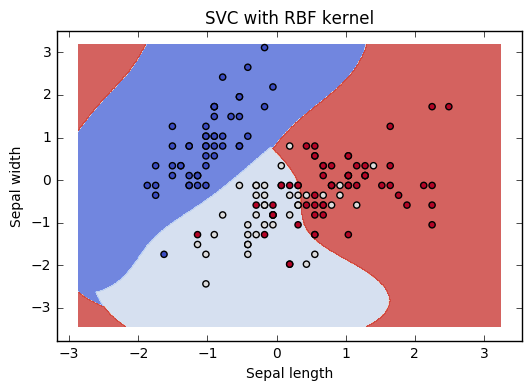

In [61]:
#visualization of SVC with RBF kernel (!with different hyperparameters parameters!)
rbf_svc = svm.SVC(kernel='rbf', gamma=0.7, C=1).fit(X, y)

Z = rbf_svc.predict(np.c_[xx.ravel(), yy.ravel()])
# Put the result into a color plot
Z = Z.reshape(xx.shape) 
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

plt.scatter(X['sep_len'], X['sep_width'], c=y, cmap=plt.cm.coolwarm)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title('SVC with RBF kernel')
plt.show()

# Beers and girls :)

<img src="imgs/beers-girls.jpg" width="800">